In [1]:
# autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys

import pathmagic
from tools.project import proj_dir

In [2]:
import tools.project

print(tools.project.get_class("data", "DDFFData"))

<class 'data.ddff_data.DDFFData'>


In [3]:
#from data import DDFFData
import data

print(data.DDFFData)

<class 'data.ddff_data.DDFFData'>


In [10]:
import torch
from net.super_slomo_net import UNet

#device = "cpu"
device = "cuda:0"

net = UNet(6, 4).to(device)

x = torch.rand([1, 6, 352, 352]).to(device)

out = net(x)

In [12]:
out.size()

torch.Size([1, 4, 352, 352])

In [17]:
import torch
from net.super_slomo_net import BackwardWarp

#device = "cpu"
device = "cuda:0"

warp = BackwardWarp(352, 352, device)

img = torch.rand([1, 3, 352, 352]).to(device)
flow = torch.rand([1, 2, 352, 352]).to(device)

img_warped = warp(img, flow)

In [18]:
img_warped.size()

torch.Size([1, 3, 352, 352])

In [64]:
from data import SuperSlomoData

train_data = SuperSlomoData(proj_dir("datasets"), "train")

_ = train_data[0]

Not preloading data.


Train Data (Count: 5440)
4
3
2
7


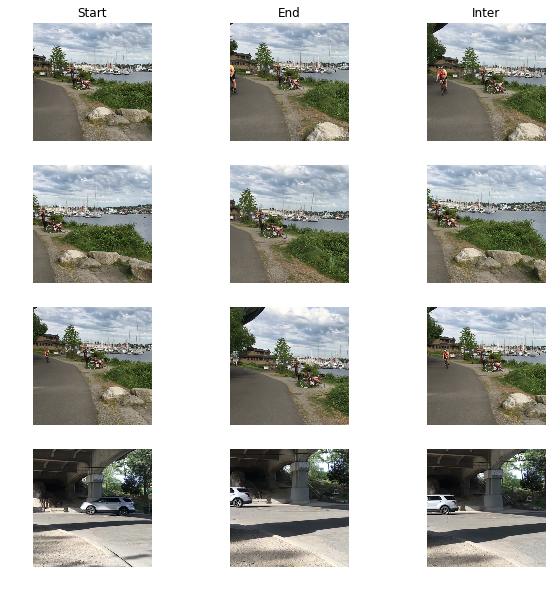

In [65]:
import data.mdff_data
from tools.vis_tools import visualize_tensors
import matplotlib.pyplot as plt
import numpy as np

def visualize_samples(data, figsize=(10, 10)):
    num_samples = 4
    vis_ids = range(0,num_samples)

    plt.figure(figsize=figsize)
    
    input_samples, target_samples = [], []
    
    for i in vis_ids:
        imgs = data[i]
        input_samples.append([imgs[0][0][j] for j in [0,1]])
        print(imgs[0][1])
        target_samples.append(imgs[1])
        
    visualize_tensors([x + [t] for x, t in zip(input_samples, target_samples)], ["Start", "End", "Inter"])
    #visualize_tensors([fs + [fs[0]] for fs in fs_samples], ["Near", "Medium", "Far", "Depth"])
    
#print(val_data.valid_crops[0])
    
print("Train Data (Count: {})".format(len(train_data)))
visualize_samples(train_data)

In [74]:
import torch
from trainer.super_slomo_loss import SuperSlomoLoss

device = "cuda:0"

input_data = torch.rand([1, 3, 352, 352]).to(device)
target_data = torch.rand([1, 3, 352, 352]).to(device)

loss_func = SuperSlomoLoss(device)

loss = loss_func(input_data, target_data)

print(loss)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(

In [2]:
import torch
from net.super_slomo_net import SuperSlomoNet

#device = "cpu"
device = "cuda:0"

net = SuperSlomoNet(352, 352, device).to(device)

x = torch.rand([1, 6, 352, 352]).to(device)

out = net([x, 3])

/home/kevin/.virtualenvs/pytorch/lib/python3.6/site-packages/torch/cuda/__init__.py:117: UserWarning: 
    Found GPU0 GeForce GTX 660M which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))
/home/kevin/.virtualenvs/pytorch/lib/python3.6/site-packages/torch/nn/functional.py:2070: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


torch.Size([6, 352, 352])

In [3]:
import torch
from net.super_slomo_net import SuperSlomoNet
from trainer.super_slomo_trainer import SuperSlomoTrainer

from data import SuperSlomoData, DatasetSubset

device = "cuda:0"
#device = "cpu"

train_data = SuperSlomoData(proj_dir("datasets"), "train")
val_data = SuperSlomoData(proj_dir("datasets"), "val")

train_data = DatasetSubset(train_data, range(0, 20))
val_data = DatasetSubset(train_data, range(0, 10))

train_loader = torch.utils.data.DataLoader(train_data, batch_size=1,
                                           shuffle=True, num_workers=1)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=1,
                                         shuffle=True, num_workers=1)

model = SuperSlomoNet(352, 352, device).to(device)

trainer = SuperSlomoTrainer(model, device)

trainer.train(train_loader, val_loader)

Not preloading data.
Not preloading data.
10:33:39 START


RuntimeError: CUDA error: out of memory

In [20]:
trainer.train(train_loader, val_loader)

10:29:01 START


/home/kevin/.virtualenvs/pytorch/lib/python3.6/site-packages/torch/nn/functional.py:2070: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


RuntimeError: CUDA error: out of memory